### Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
# import osmnx as ox
import contextily as cx
# import geodatasets
# import folium
# from shapely.geometry import Point


In [2]:
df = pd.read_csv("MVG_Rad_Fahrten_2022.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])
df.head()

/var/folders/pd/zg0xw_j14k3gvz5jqksfy67m0000gn/T/ipykernel_93561/1246116100.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MVG_Rad_Fahrten_2022.csv", sep=";", decimal=",", parse_dates=["STARTTIME       ", "ENDTIME         "])


,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME
0,1,2022-01-01 00:02:00,2022-01-01 00:09:00,48.13658,11.59283,48.14159,11.59721,0,,0,
1,2,2022-01-01 00:03:00,2022-01-01 00:07:00,48.13659,11.59282,48.14165,11.59701,0,,0,
2,3,2022-01-01 00:16:00,2022-01-01 00:29:00,48.16849,11.55028,48.15526,11.54012,0,,1,Albrechtstraße
3,4,2022-01-01 00:16:00,2022-01-01 00:29:00,48.16852,11.5502,48.15526,11.54012,0,,1,Albrechtstraße
4,5,2022-01-01 00:21:00,2022-01-01 00:44:00,47.88872,11.29944,48.12047,11.54213,0,,0,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709144 entries, 0 to 709143
Data columns (total 11 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   Row                                           709144 non-null  int64         
 1   STARTTIME                                     709144 non-null  datetime64[ns]
 2   ENDTIME                                       709144 non-null  datetime64[ns]
 3   STARTLAT                                      709144 non-null  object        
 4   STARTLON                                      709144 non-null  object        
 5   ENDLAT                                        709144 non-null  object        
 6   ENDLON                                        709144 non-null  object        
 7   RENTAL_IS_STATION                             709144 non-null  int64         
 8   RENTAL_STATION_NAME                           709144 n

In [4]:
df["RENTAL_IS_STATION"].value_counts() # erwartet: 0, 1

RENTAL_IS_STATION
0    512576
1    196568
Name: count, dtype: int64

In [5]:
df["RETURN_IS_STATION"].value_counts() # erwartet: 0, 1

RETURN_IS_STATION
0                    506445
1                    137163
0                     49693
1                     15842
                          1
Name: count, dtype: int64

In [6]:
df.describe()

,Row,STARTTIME,ENDTIME,RENTAL_IS_STATION
count,709144.000000,709144,709144,709144.000000
mean,354572.500000,2022-07-07 06:58:02.994821376,2022-07-07 07:30:13.469591808,0.277191
min,1.000000,2022-01-01 00:02:00,2022-01-01 00:07:00,0.000000
25%,177286.750000,2022-05-08 22:11:30,2022-05-08 22:50:45,0.000000
50%,354572.500000,2022-07-08 17:47:30,2022-07-08 18:06:00,0.000000
75%,531858.250000,2022-09-09 07:12:30,2022-09-09 07:55:15,1.000000
max,709144.000000,2022-12-31 23:52:00,2023-01-02 09:19:00,1.000000
std,204712.383985,NaN,NaN,0.447612


In [7]:
# Spaltennamen
df.columns

Index(['Row   ', 'STARTTIME       ', 'ENDTIME         ', 'STARTLAT',
       'STARTLON ', 'ENDLAT  ', 'ENDLON   ', 'RENTAL_IS_STATION',
       'RENTAL_STATION_NAME                         ', 'RETURN_IS_STATION',
       'RETURN_STATION_NAME                         '],
      dtype='object')

In [8]:
# Übersicht Anzahl Ausleihen ab Station
print(df["RENTAL_STATION_NAME                         "].value_counts())

RENTAL_STATION_NAME                         
                                                512576
Sandstraße                                        4303
TUM Arcisstraße                                   3678
Münchner Freiheit                                 3513
Olympiazentrum                                    3178
                                                 ...  
Waldkirchbogen / Neuried                             6
Kämpferstr                                           6
Aubing                                               2
Freiham                                              1
Mainaustraße                                         1
Name: count, Length: 326, dtype: int64


In [9]:
# Welche Stationen gibt es?
stations = df["RETURN_STATION_NAME                         "].unique()
stations.sort()
print(stations)
print(len(stations))

['                                            '
 'AGROB Nord Ismaning                         '
 'AGROB Süd Ismaning                          '
 'Ackermannstraße                             '
 'Ahornring Taufkirchen                       '
 'Ainmillerstraße                             '
 'Albrechtstraße                              '
 'Alte Heide                                  '
 'Altes Rathaus Unterschleißheim              '
 'Am Bahnhof Unterföhring                     '
 'Am Glockenbach                              '
 'Am Haag Gräfelfing                          '
 'Am Haderner Winkel Neuried                  '
 'Am Hart                                     '
 'Am See Haar                                 '
 'Am Sportpark Aschheim                       '
 'Am Sportpark Feldkirchen                    '
 'Am Sportpark Neuried                        '
 'Am Sportpark Unterhaching                   '
 'Am Weiher Unterschleißheim                  '
 'Amalienburgstraße                     

In [10]:
# Wieviele Rückgaben an Beispielstation
df["RETURN_STATION_NAME                         "].value_counts().get("Ackermannstraße                             ")

np.int64(963)

In [11]:
# Wieviele Ausleihen an Beispielstation
df["RENTAL_STATION_NAME                         "].value_counts().get("Ackermannstraße                             ")

np.int64(1254)

In [12]:
# Stationsausleihen insgesamt
rentals = pd.DataFrame(df["RENTAL_STATION_NAME                         "].value_counts())
rentals = rentals.reset_index()
rentals = rentals.rename(columns={"RETURN_STATION_NAME                         ": "STATION_NAME"})
rentals

,RENTAL_STATION_NAME,count
0,,512576
1,Sandstraße,4303
2,TUM Arcisstraße,3678
3,Münchner Freiheit,3513
4,Olympiazentrum,3178
...,...,...
321,Waldkirchbogen / Neuried,6
322,Kämpferstr,6
323,Aubing,2
324,Freiham,1


In [13]:
# Stationsrückgaben insgesamt
returns = pd.DataFrame(df["RETURN_STATION_NAME                         "].value_counts())
returns = returns.reset_index()
returns = returns.rename(columns={"RETURN_STATION_NAME                         ": "STATION_NAME"})
returns

,STATION_NAME,count
0,,556139
1,Sandstraße,3664
2,TUM Arcisstraße,2904
3,Hauptbahnhof Nord,2834
4,Olympiazentrum,2615
...,...,...
326,Freiham,3
327,Bodenseestraße,3
328,Westkreuz,2
329,Leienfelsstraße,1


In [14]:
# An wievielen Stationen weniger Ausleihen als Rückgaben
diff = rentals["count"] - returns["count"]
len(diff[diff < 1])

57

In [15]:
# Ergänze Fahrtdauer
df["Dauer"] = df['ENDTIME         '] - df['STARTTIME       ']

In [16]:
df.head()

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer
0,1,2022-01-01 00:02:00,2022-01-01 00:09:00,48.13658,11.59283,48.14159,11.59721,0,,0,,0 days 00:07:00
1,2,2022-01-01 00:03:00,2022-01-01 00:07:00,48.13659,11.59282,48.14165,11.59701,0,,0,,0 days 00:04:00
2,3,2022-01-01 00:16:00,2022-01-01 00:29:00,48.16849,11.55028,48.15526,11.54012,0,,1,Albrechtstraße,0 days 00:13:00
3,4,2022-01-01 00:16:00,2022-01-01 00:29:00,48.16852,11.5502,48.15526,11.54012,0,,1,Albrechtstraße,0 days 00:13:00
4,5,2022-01-01 00:21:00,2022-01-01 00:44:00,47.88872,11.29944,48.12047,11.54213,0,,0,,0 days 00:23:00


In [17]:
df.Dauer.min()

Timedelta('-1 days +23:06:00')

In [18]:
# Rückgabe vor Ausleihe

mask = (df['ENDTIME         '] < df['STARTTIME       '])
df.loc[mask]

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer
630468,630469,2022-10-30 02:28:00,2022-10-30 02:21:00,48.1519,11.56578,48.16546,11.59553,0,,0,,-1 days +23:53:00
630476,630477,2022-10-30 02:33:00,2022-10-30 02:23:00,48.16508,11.59088,48.14297,11.50648,0,,0,,-1 days +23:50:00
630484,630485,2022-10-30 02:35:00,2022-10-30 02:11:00,48.11298,11.51665,48.18344,11.51834,0,,0,,-1 days +23:36:00
630486,630487,2022-10-30 02:37:00,2022-10-30 02:03:00,48.12877,11.60429,48.16662,11.57873,0,,1,Bonner Platz,-1 days +23:26:00
630496,630497,2022-10-30 02:39:00,2022-10-30 02:02:00,48.13288,11.56657,48.15011,11.53609,0,,0,,-1 days +23:23:00
630497,630498,2022-10-30 02:40:00,2022-10-30 02:10:00,48.13034,11.5583,48.17842,11.55658,0,,1,Olympiazentrum,-1 days +23:30:00
630498,630499,2022-10-30 02:40:00,2022-10-30 02:11:00,48.13042,11.55816,48.17842,11.55658,0,,1,Olympiazentrum,-1 days +23:31:00
630500,630501,2022-10-30 02:41:00,2022-10-30 02:06:00,48.18325,11.60842,48.18283,11.55153,0,,0,,-1 days +23:25:00
630506,630507,2022-10-30 02:44:00,2022-10-30 02:06:00,48.1354,11.57407,48.14481,11.6195,0,,0,,-1 days +23:22:00
630509,630510,2022-10-30 02:46:00,2022-10-30 02:09:00,48.16573,11.59544,48.1746,11.52716,0,,0,,-1 days +23:23:00


In [19]:
# Geodaten, Anzeige auf Karte
geo = gpd.points_from_xy(y=df['STARTLAT'], x=df['STARTLON '])
gdf = gpd.GeoDataFrame(df, geometry=geo)
gdf

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer,geometry
0,1,2022-01-01 00:02:00,2022-01-01 00:09:00,48.13658,11.59283,48.14159,11.59721,0,,0,,0 days 00:07:00,POINT (11.59283 48.13658)
1,2,2022-01-01 00:03:00,2022-01-01 00:07:00,48.13659,11.59282,48.14165,11.59701,0,,0,,0 days 00:04:00,POINT (11.59282 48.13659)
2,3,2022-01-01 00:16:00,2022-01-01 00:29:00,48.16849,11.55028,48.15526,11.54012,0,,1,Albrechtstraße,0 days 00:13:00,POINT (11.55028 48.16849)
3,4,2022-01-01 00:16:00,2022-01-01 00:29:00,48.16852,11.5502,48.15526,11.54012,0,,1,Albrechtstraße,0 days 00:13:00,POINT (11.5502 48.16852)
4,5,2022-01-01 00:21:00,2022-01-01 00:44:00,47.88872,11.29944,48.12047,11.54213,0,,0,,0 days 00:23:00,POINT (11.29944 47.88872)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709139,709140,2022-12-31 23:38:00,2022-12-31 23:48:00,48.16371,11.57453,48.16843,11.55567,0,,0,,0 days 00:10:00,POINT (11.57453 48.16371)
709140,709141,2022-12-31 23:39:00,2023-01-01 00:56:00,48.15855,11.53505,48.17049,11.54825,0,,0,,0 days 01:17:00,POINT (11.53505 48.15855)
709141,709142,2022-12-31 23:43:00,2022-12-31 23:57:00,48.15772,11.51174,48.17067,11.54825,0,,0,,0 days 00:14:00,POINT (11.51174 48.15772)
709142,709143,2022-12-31 23:48:00,2022-12-31 23:56:00,48.14471,11.61595,48.14085,11.59835,0,,0,,0 days 00:08:00,POINT (11.61595 48.14471)


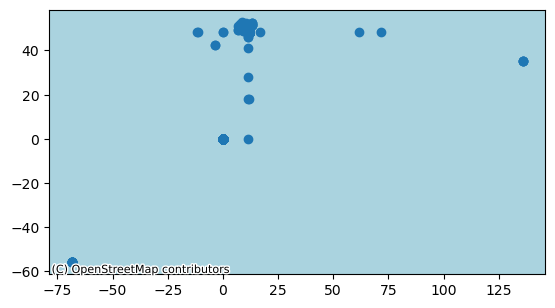

In [20]:
ax = gdf.plot()
cx.add_basemap(ax, crs ="EPSG:3857", source=cx.providers.OpenStreetMap.Mapnik)

In [21]:
# City als Hintergrund
# city = ox.geocode_to_gdf("Munich, Bavaria, Germany")
# fig, ax = plt.subplots(figsize=(15, 15))
# city.plot(ax=ax)

In [22]:
# geo2 = [Point(lon, lat) for lon, lat in zip(df["STARTLON "], df["STARTLAT"])]
# gdf2 = gpd.GeoDataFrame(df, geometry=geo2)

# gdf2.plot(marker="o", figsize=(10,10))
# plt.show()

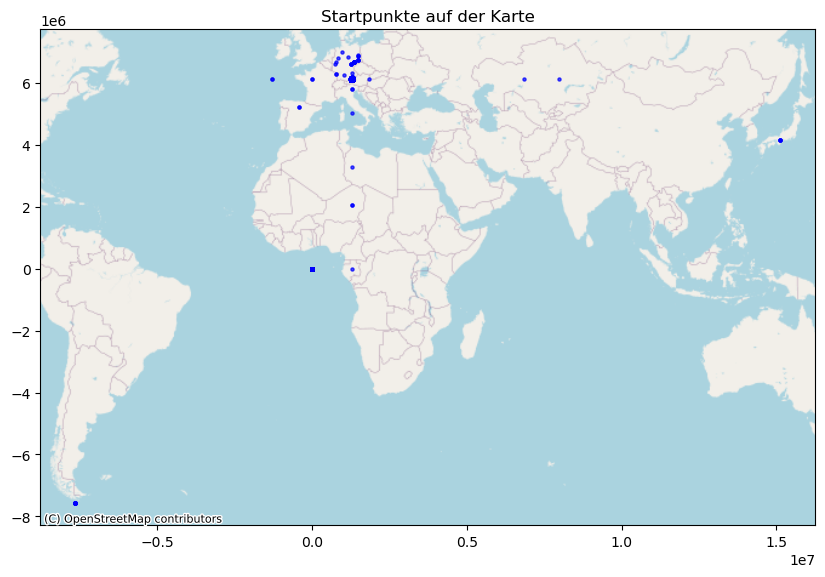

In [23]:
# CRS-Daten
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg=3857)

# Plotten des GeoDataFrames
fig, ax = plt.subplots(figsize=(10, 10))

# Plotten der Punkte
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)

# Füge die Basemap von contextily hinzu
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Achsentitel und Anzeige der Karte
ax.set_title('Startpunkte auf der Karte')
plt.show()

In [24]:
# Test mit Folium, zu viele Daten!
# map_center = [df['STARTLAT'].mean(), df['STARTLON '].mean()]
# my_map = folium.Map(location=map_center, zoom_start=6)

In [25]:
# Auswertung Startlat
startlat_values = df["STARTLAT"].values
pd.DataFrame(startlat_values).describe()

,0
count,709144
unique,14276
top,48.15128
freq,4436


In [26]:
# Auswertung Startlon
startlon_values = df["STARTLON "].values
pd.DataFrame(startlon_values).describe()

,0
count,709144
unique,19231
top,11.55832
freq,4397


In [28]:
# Funktion zur Formatierung der Location

def format_coordinate(coordinate:str) -> float:
    """Takes unformatted longitudinal or latitudinal data and returns them as float.

    Args:
        coordinate (str): longitudinal or latitudinal data, unformatted

    Returns:
        float: longitudinal or latitudinal data as float
    """
    if type(coordinate) == str:
        coordinate = coordinate.strip()
        if "," in coordinate:
            coordinate = coordinate.replace(",", ".")
    
    return float(coordinate)


In [ ]:
df["STARTLAT"] = df["STARTLAT"].apply(format_coordinate)

In [30]:
# Wo/Wie oft Startlat kleiner als 48?
df[(df["STARTLAT"] < 48)]

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer
4,5,2022-01-01 00:21:00,2022-01-01 00:44:00,47.88872,11.29944,48.12047,11.54213,0,,0,,0 days 00:23:00
168,169,2022-01-01 04:05:00,2022-01-01 04:18:00,47.99317,11.7369,47.9843,11.71584,1,Bahnhof Dürnhaar,1,Ottobrunner Straße Faistenhaar,0 days 00:13:00
171,172,2022-01-01 04:06:00,2022-01-01 04:19:00,47.99317,11.7369,47.9843,11.71584,1,Bahnhof Dürnhaar,1,Ottobrunner Straße Faistenhaar,0 days 00:13:00
829,830,2022-01-01 16:49:00,2022-01-01 17:05:00,0.00000,0,48.15486,11.53751,0,,0,,0 days 00:16:00
835,836,2022-01-01 16:52:00,2022-01-01 17:04:00,47.98409,11.70015,47.99317,11.7369,1,Kirchplatz Hofolding,1,Bahnhof Dürnhaar,0 days 00:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...
707901,707902,2022-12-30 19:52:00,2022-12-30 20:01:00,0.00000,0,48.13061,11.57847,0,,0,,0 days 00:09:00
708255,708256,2022-12-31 11:40:00,2022-12-31 11:46:00,35.00426,135.76985,48.20144,11.58904,0,,0,,0 days 00:06:00
708632,708633,2022-12-31 14:49:00,2022-12-31 14:55:00,0.00000,0,48.10701,11.55235,0,,1,Flauchersteg,0 days 00:06:00
708828,708829,2022-12-31 16:33:00,2022-12-31 16:48:00,0.00000,0,0,0,0,,0,,0 days 00:15:00


In [33]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.RENTAL_IS_STATION.unique()

array([0, 1])

In [32]:
df[(df["RENTAL_IS_STATION"] == 12) & (df["RENTAL_STATION_NAME                         "] != "                                            ")]

,Row,STARTTIME,ENDTIME,STARTLAT,STARTLON,ENDLAT,ENDLON,RENTAL_IS_STATION,RENTAL_STATION_NAME,RETURN_IS_STATION,RETURN_STATION_NAME,Dauer


### Reparaturbedarf:
- Spaltennamen
- Werte formatieren und löschen RETURN_IS_STATION und RENTAL_IS_STATION ("0" > 0, "1" > 1, 12 > 0, "12" > 0)
- Rückgabe vor Ausleihe
- LAT zwischen 48.0 und 48.3
- LON zwischen 11.3 und 11.8
- Stationennamen händisch prüfen